In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DMW/datasets/customer_segmentation.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.drop(['ID'], inplace = True, axis = 1)

In [ ]:
features = df[df.columns]

scaler = StandardScaler()
scaled = scaler.fit_transform(features.values)
scaled = pd.DataFrame(scaled,columns=df.columns)
scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

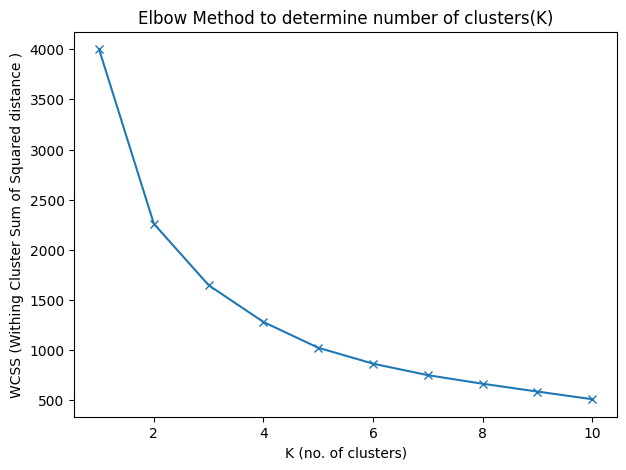

In [ ]:
data = scaled[['Age','Income']]

# elbow curve
wcss = {'wcss_score':[],'no_of_clusters':[]}
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=10)
  kmeans.fit(data)
  wcss['wcss_score'].append(kmeans.inertia_)
  wcss['no_of_clusters'].append(i)

plt.figure(figsize=(7,5))
plt.plot(wcss['no_of_clusters'],wcss['wcss_score'],marker='x')
plt.title("Elbow Method to determine number of clusters(K)")
plt.xlabel("K (no. of clusters)")
plt.ylabel("WCSS (Withing Cluster Sum of Squared distance )")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(data)

prediction = kmeans.fit_predict(data)

clustered_data = df.copy()
clustered_data['clustered_index'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income'>

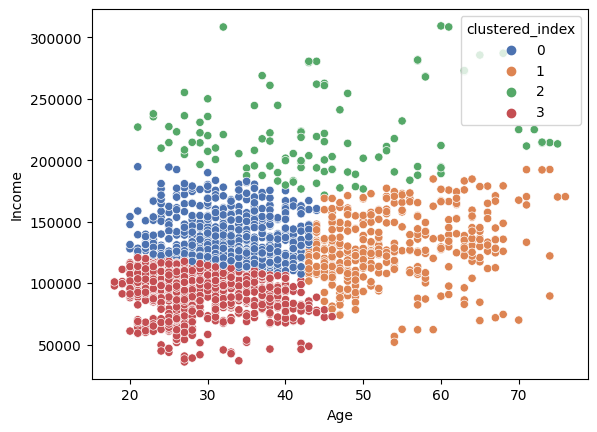

In [ ]:
sns.scatterplot(x=clustered_data.Age, y=clustered_data.Income, hue=clustered_data.clustered_index, palette='deep')

In [ ]:
# checking the quality of clustering
score = silhouette_score(X=df,labels=clustered_data.clustered_index)
score

0.238448488332598

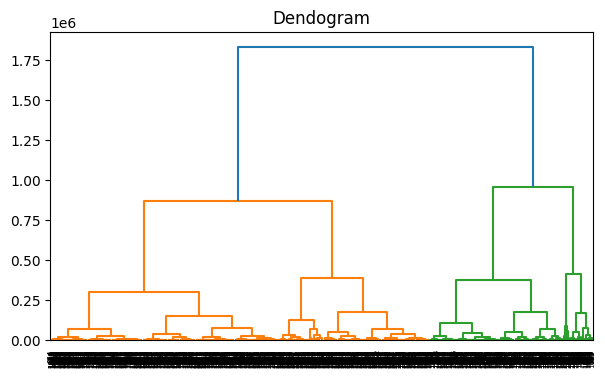

In [ ]:
# Hierarchichal clustering - linkage = ward
from scipy.cluster.hierarchy import dendrogram,linkage
data = clustered_data[['Age','Income']]

plt.figure(figsize=(7,4))
plt.title("Dendogram")
dend = dendrogram(linkage(data,method='ward'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income'>

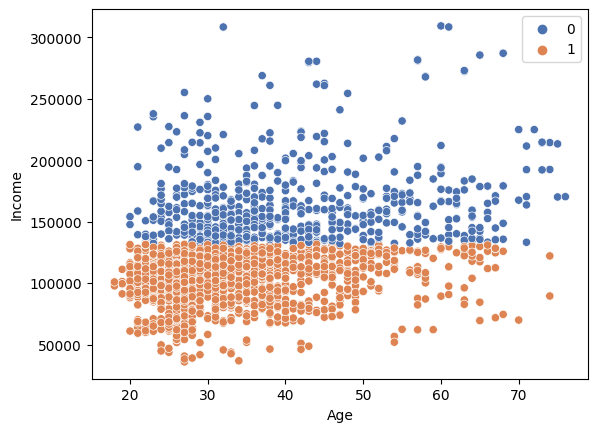

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_ = cluster.fit_predict(data)

sns.scatterplot(x=data.Age, y=data.Income, hue=labels_, palette='deep')

In [ ]:
distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

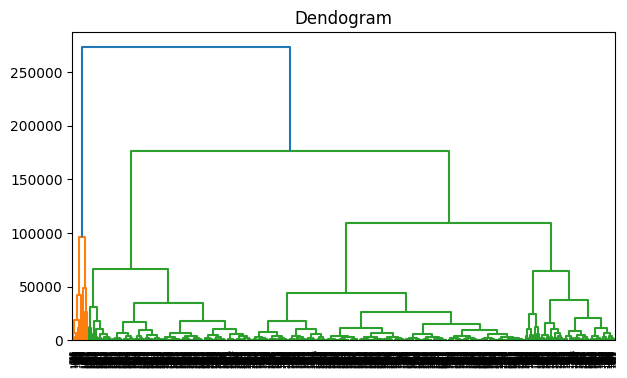

In [ ]:
# Hierarchichal clustering - linkage = complete
from scipy.cluster.hierarchy import dendrogram,linkage
data = clustered_data[['Age','Income']]

plt.figure(figsize=(7,4))
plt.title("Dendogram")
dend = dendrogram(linkage(data,method='complete'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income'>

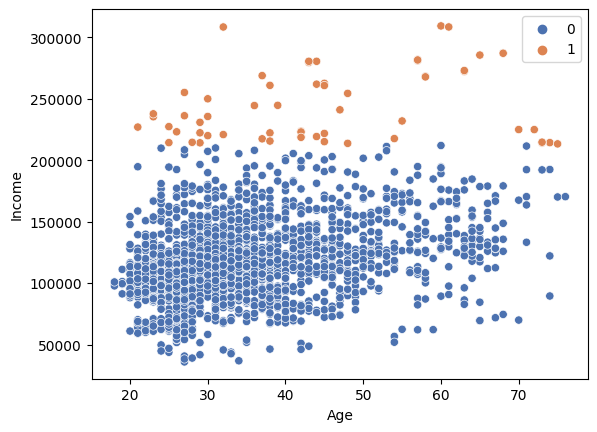

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels_ = cluster.fit_predict(data)

sns.scatterplot(x=data.Age, y=data.Income, hue=labels_, palette='deep')

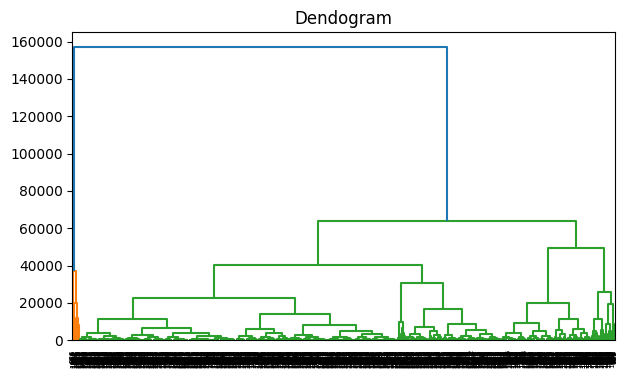

In [23]:
# Hierarchichal clustering - linkage = complete
from scipy.cluster.hierarchy import dendrogram,linkage
data = clustered_data[['Age','Income']]

plt.figure(figsize=(7,4))
plt.title("Dendogram")
dend = dendrogram(linkage(data,method='average'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income'>

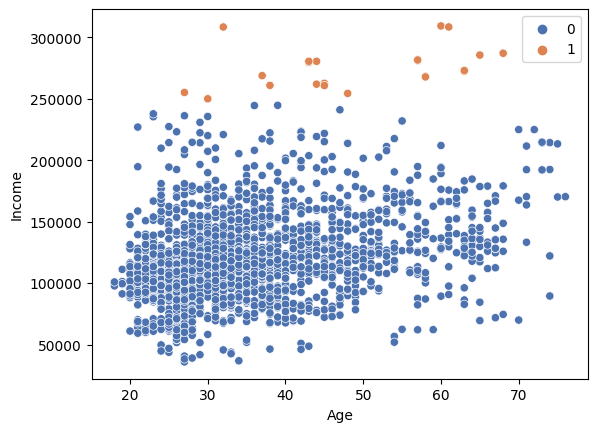

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
labels_ = cluster.fit_predict(data)

sns.scatterplot(x=data.Age, y=data.Income, hue=labels_, palette='deep')